In [22]:
import pandas as pd
import os
import numpy as np
birddata=pd.read_csv("bird_tracking_1.csv")
birddata.head()

Unnamed: 0  altitude               date_time  device_info_serial  \
0           0        71  2013-08-15 00:18:08+00                 851   
1           1        68  2013-08-15 00:48:07+00                 851   
2           2        68  2013-08-15 01:17:58+00                 851   
3           3        73  2013-08-15 01:47:51+00                 851   
4           4        69  2013-08-15 02:17:42+00                 851   

    direction   latitude  longitude  speed_2d bird_name  
0 -150.469753  49.419860   2.120733  0.150000      Eric  
1 -136.151141  49.419880   2.120746  2.438360      Eric  
2  160.797477  49.420310   2.120885  0.596657      Eric  
3   32.769360  49.420359   2.120859  0.310161      Eric  
4   45.191230  49.420331   2.120887  0.193132      Eric

In [23]:
#exercise 1
# In Exercise 1, we will group the dataframe by birdname and then find the average speed_2d for each bird. pandas makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe.

# Instructions
# Fill in the code to find the mean altitudes of each bird using the pre-loaded birddata dataframe.

# Here is the code:

# First, use `groupby` to group up the data.
grouped_birds = birddata.groupby("bird_name")

# Now operations are performed on each group.
mean_speeds = grouped_birds.speed_2d.mean()

# Find the mean `altitude` for each bird.
# Assign this to `mean_altitudes`.
mean_altitudes = grouped_birds.altitude.mean()

In [24]:
mean_speeds

bird_name
Eric     2.300545
Nico     2.908726
Sanne    2.450434
Name: speed_2d, dtype: float64

In [35]:
# Exercise 2
# In Exercise 2, we will group the flight times by date and calculate the mean altitude within that day.

# Instructions
# Convert birddata.date_time to the pd.datetime format, and store as birddata["date"].

# Fill in the code below to find the mean altitudes for each day:

# Convert birddata.date_time to the `pd.datetime` format.
birddata.date_time = pd.to_datetime(birddata.date_time)

# Create a new column of day of observation
birddata["date"] = birddata.date_time.dt.date

# Check the head of the column.
birddata.date.head()

# Use `groupby()` to group the data by date.
grouped_bydates = birddata.groupby("date")

# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates.altitude.mean()

In [37]:
mean_altitudes_perday

date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
                 ...    
2014-04-26     15.118012
2014-04-27     23.897297
2014-04-28     37.716867
2014-04-29     19.244792
2014-04-30     13.954545
Name: altitude, Length: 259, dtype: float64

In [28]:
#Exercise 3
#----------

#birddata already contains the date column. To find the average speed for each 
#bird and day, create a new grouped dataframe called grouped_birdday that 
#groups the data by both bird_name and date.

grouped_birdday = birddata.groupby(["bird_name", "date"])
mean_altitudes_perday = grouped_birdday.altitude.mean()

# look at the head of `mean_altitudes_perday`.
mean_altitudes_perday.head()


bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
Name: altitude, dtype: float64

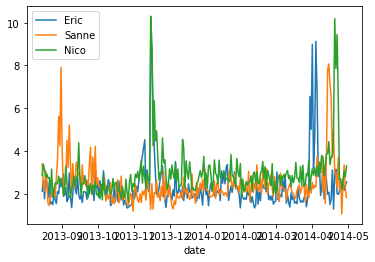

In [29]:
#Exercise 4
#----------

#Great! Now find the average speed for each bird and day. Store these are three 
#pandas Series objects – one for each bird.

#Use the plotting code provided to plot the average speeds for each bird.

import matplotlib.pyplot as plt

eric_daily_speed  = grouped_birdday.speed_2d.mean()["Eric"]
sanne_daily_speed = grouped_birdday.speed_2d.mean()["Sanne"]
nico_daily_speed  = grouped_birdday.speed_2d.mean()["Nico"]

eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()